In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Machine Learning Models
- Applied *TF-IDF Vectorization* to extract features from text.  
- Trained two models:  
  - Naive Bayes   
  - Logistic Regression  
- Used *Confusion Matrix* to evaluate predictions.

## Load Cleaned Data

The cleaned dataset prepared in the EDA notebook is loaded here to ensure continuity and avoid repeating preprocessing steps. We focus on the description and type columns for feature engineering and classification.

In [18]:

df_clean= pd.read_csv('netflix_titles_clean.csv')
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Prep

In [19]:
x= df_clean['description']
y= df_clean['type']


In [20]:
print("\n Train Test Split:\n")
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42)
print ('\n The total number of training data:',y_train.shape)
print ('\n The total number of testing data:',y_test.shape)


 Train Test Split:


 The total number of training data: (7047,)

 The total number of testing data: (1762,)


# TF-IDF Vectorization

In [21]:
vectorizer= TfidfVectorizer(stop_words='english',max_features=3000, ngram_range=(1,2))
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

## Model 1 – Naive Bayes

As a baseline, I use the Multinomial Naive Bayes classifier, which is widely used for text classification problems. This model provides an initial understanding of how well the descriptions can predict the content type.

Key observations:

The model achieved reasonable accuracy but showed bias towards predicting the majority class.

In [22]:
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred_nb = nb.predict(x_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7298524404086265
              precision    recall  f1-score   support

       Movie       0.72      0.97      0.83      1194
     TV Show       0.79      0.22      0.35       568

    accuracy                           0.73      1762
   macro avg       0.76      0.60      0.59      1762
weighted avg       0.74      0.73      0.67      1762



## Model 2 – Logistic Regression with Class Balancing

To address class imbalance (where movies are more prevalent than TV shows), I applied Logistic Regression with balanced class weights. This improved the recall for TV shows and made the classification more fair and effective.

Key observations:

The model performed better on minority classes, improving prediction accuracy across both categories.

In [23]:
model= LogisticRegression(class_weight="balanced", max_iter=200, solver="saga")
model.fit(x_train_tfidf, y_train)
y_predicted = model.predict(x_test_tfidf)

print("logistic Regression Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

logistic Regression Accuracy: 0.7190692395005676
              precision    recall  f1-score   support

       Movie       0.81      0.76      0.79      1194
     TV Show       0.56      0.63      0.59       568

    accuracy                           0.72      1762
   macro avg       0.68      0.70      0.69      1762
weighted avg       0.73      0.72      0.72      1762



## Confusion Matrix (Visual Evaluation)

The confusion matrix helps visualize the model’s performance by showing how many actual movies or TV shows were correctly or incorrectly classified.

Insights:

Logistic Regression showed better recall for TV shows.

The matrix helped identify areas for further improvement in future iterations.

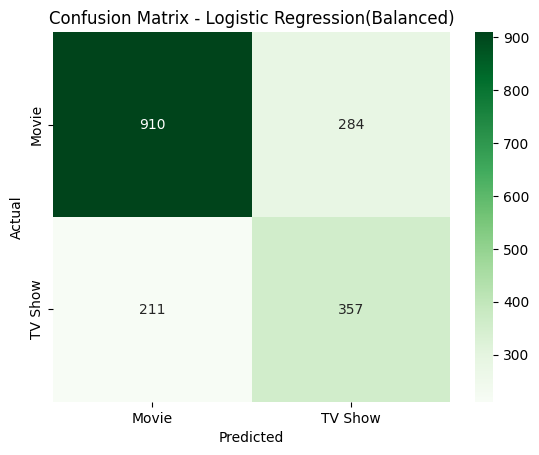

In [24]:
CM = confusion_matrix(y_test, y_predicted, labels=model.classes_)
sns.heatmap(CM, annot=True, fmt="d" , cmap="Greens", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Logistic Regression(Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Machine Learning Model Results

We applied two supervised learning models on the Netflix dataset (TF-IDF vectorized description column) to classify whether a title is a *Movie* or a *TV Show*.  

### Naive Bayes
- Accuracy: *72.9%*  
- Model performed well for text classification but showed a slight bias towards the majority class.  

### Logistic Regression
- Accuracy: *71.9%*  
- Performance was slightly lower than Naive Bayes in raw accuracy, but the *confusion matrix results were more balanced*, meaning it handled both Movies and TV Shows more evenly.  

### Key Takeaway
Even though Naive Bayes had a higher accuracy, Logistic Regression provided a more balanced classification.  
This highlights the importance of looking beyond accuracy and using evaluation metrics like the *confusion matrix* when comparing models.